In [14]:
import matplotlib.pyplot as plt
import numpy as np


def sum_series(n):
    total = 0.0
    for i in range(1, n + 1):
        total += 1 / (2 * i - 1)
    return total

#code for expectaion


In [16]:
def compute_probabilities(n_max):
    P = {}
    P[(0, 0)] = 1.0
    for n in range(1, n_max + 1):
        for k in range(0, n + 1):
            P[(n, k)] = 0.0
    for n in range(1, n_max + 1):
        for k in range(1, n + 1):
            P[(n, k)] = (1 / (2 * n - 1)) * P.get((n - 1, k - 1), 0) + ((2 * n - 2) / (2 * n - 1)) * P.get((n - 1, k), 0)
    return P

#code for probability

In [5]:
k_vals = np.arange(1, 10)
n_at_peak = np.array([1, 5, 45, 363, 2789, 21080, 158043, 1179639, 8781285])
prob_peaks = np.array([1.00000000, 0.42328042, 0.28976780, 0.23401007, 0.20167167,
                       0.17990506, 0.16396246, 0.15163248, 0.14172672])

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Number of Loops (k)')
ax1.set_ylabel('n at peak', color=color1)
ax1.semilogy(k_vals, n_at_peak, marker='o', linestyle='-', color=color1, label='n at peak')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(k_vals)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Peak Probability', color=color2)
ax2.plot(k_vals, prob_peaks, marker='s', linestyle='--', color=color2, label='Peak Probability')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Peak n and Probability for Loop Counts k = 1 to 9')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

def track_peak_counts(count_limit, idle_limit):
    best_n    = np.zeros(count_limit + 1, dtype=np.int64)
    best_prob = np.zeros(count_limit + 1)
    last_hit  = np.zeros(count_limit + 1, dtype=np.int64)
    done      = np.zeros(count_limit + 1, dtype=np.int64)

    prev_row = np.zeros(count_limit + 1)
    prev_row[0] = 1.0

    total = 1
    while True:
        max_k = min(total, count_limit)
        curr_row = np.zeros(count_limit + 1)
        denom = 2 * total - 1
        for k in range(1, max_k + 1):
            curr_row[k] = (1.0 / denom) * prev_row[k - 1] + ((2 * total - 2) / denom) * prev_row[k]

        peak = max_k
        if max_k > 1:
            for k in range(1, max_k):
                if curr_row[k] > curr_row[k + 1]:
                    peak = k
                    break
        else:
            peak = 1

        if peak <= count_limit and done[peak] == 0:
            if curr_row[peak] > best_prob[peak]:
                best_prob[peak] = curr_row[peak]
                best_n[peak] = total
                last_hit[peak] = total

        for k in range(1, 7):
            if done[k] == 0 and total >= 100000:
                done[k] = 1
        for k in range(7, 10):
            if done[k] == 0 and total >= 10000000:
                done[k] = 1

        if np.all(done[1:count_limit + 1]):
            break

        prev_row = curr_row
        total += 1

    return best_n, best_prob

count_limit = 9
idle_limit = 1000000
best_n, best_prob = track_peak_counts(count_limit, idle_limit)

for k in range(1, count_limit + 1):
    print(f"{k} loops: peak probability {best_prob[k]:.8f} at total = {best_n[k]}")

#inputs for graph

1 loops: peak probability 1.00000000 at total = 1
2 loops: peak probability 0.42328042 at total = 5
3 loops: peak probability 0.28976780 at total = 45
4 loops: peak probability 0.23401007 at total = 363
5 loops: peak probability 0.20167167 at total = 2789
6 loops: peak probability 0.17990506 at total = 21080
7 loops: peak probability 0.16396246 at total = 158043
8 loops: peak probability 0.15163248 at total = 1179639
9 loops: peak probability 0.14172672 at total = 8781285


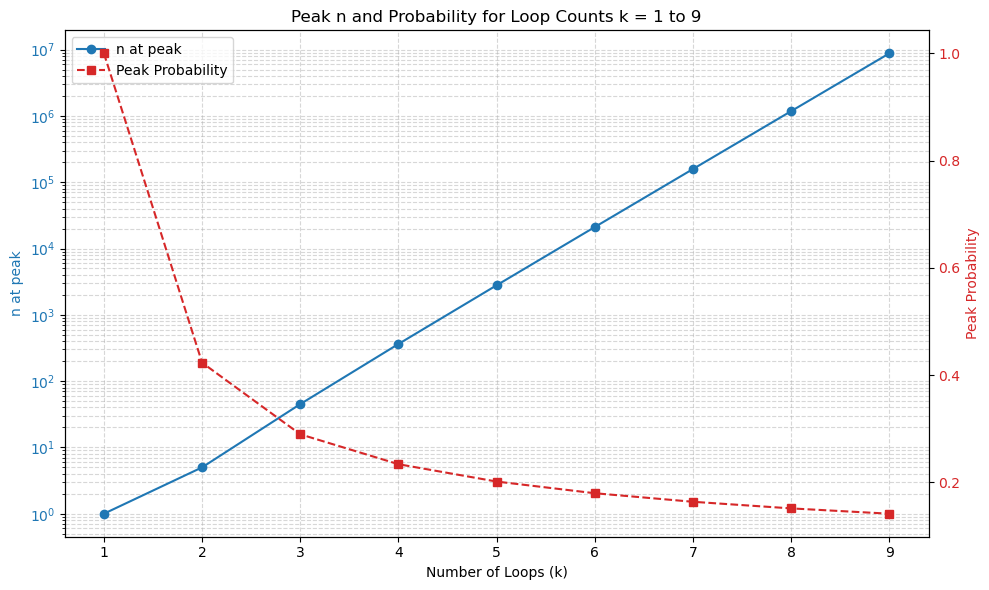

In [20]:
k_vals = np.arange(1, 10)
n_at_peak = np.array([1, 5, 45, 363, 2789, 21080, 158043, 1179639, 8781285])
prob_peaks = np.array([1.00000000, 0.42328042, 0.28976780, 0.23401007, 0.20167167,
                       0.17990506, 0.16396246, 0.15163248, 0.14172672])

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Number of Loops (k)')
ax1.set_ylabel('n at peak', color=color1)
ax1.semilogy(k_vals, n_at_peak, marker='o', linestyle='-', color=color1, label='n at peak')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(k_vals)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Peak Probability', color=color2)
ax2.plot(k_vals, prob_peaks, marker='s', linestyle='--', color=color2, label='Peak Probability')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Peak n and Probability for Loop Counts k = 1 to 9')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()